# **Phish Detector**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Data Exploration

In [15]:
emails = pd.read_csv('Phishing_Email.csv')
display(emails.head())
display(emails.info())
emails['Email Type'].value_counts()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


None

,Unnamed: 0
count,18650.000000
mean,9325.154477
std,5384.327293
min,0.000000
25%,4662.250000
50%,9325.500000
75%,13987.750000
max,18650.000000


Email Type
Safe Email        11322
Phishing Email     7328
Name: count, dtype: int64

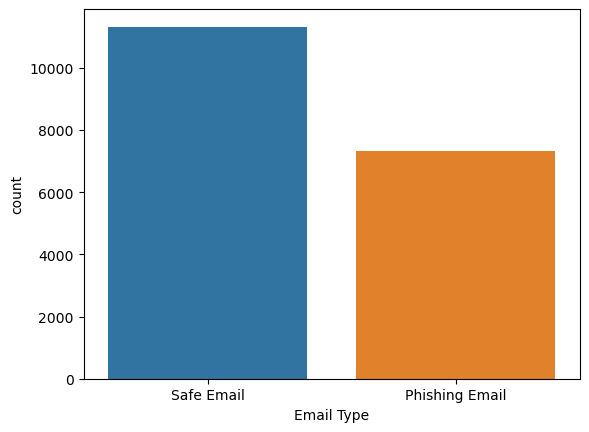

In [33]:
sns.countplot(x='Email Type', data=emails)
plt.show()

### Analysis

From the data exploration, we can tell that the data has two features, email text and type, with type being either phishing or safe. The bar plot shows a healthy distribution and no extreme imbalance.

### Data Preprocessing

In [37]:
#remove null
emails['Email Text'].fillna('No Content', inplace=True)

#TF-IDF evaluates term frequency to process language into numbers to use in models. Simple and great for text classification.
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)
X = tfidf.fit_transform(emails['Email Text'])
Y = emails['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)


### Model Building and Evaluation

In [50]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train a model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Predict and evaluate
Y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(Y_test, Y_pred):.2f}')
print(classification_report(Y_test, Y_pred))#Next steps: more data sets, explain model, use more advanced models, chat, create document of whole thing(motivations, steps), nextstep chatgpt phishing

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2273
           1       0.93      0.95      0.94      1457

    accuracy                           0.95      3730
   macro avg       0.95      0.95      0.95      3730
weighted avg       0.95      0.95      0.95      3730

